In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_market_data = scaler.fit_transform(market_data_df)

scaled_market_data

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [22]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_market_data)

# Copy the crypto names from the original data
scaled_market_data_df.columns = market_data_df.columns

# Set the coinid column as index
scaled_market_data_df.set_index(market_data_df.index, inplace=True)

# Display sample data
scaled_market_data_df
# market_data_df.index

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [34]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
potential_k_values = list(range(1, 11))

# Create an empty list to store the inertia values
intertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in potential_k_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_market_data_df)
    intertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_map = {x:y for x,y in zip(potential_k_values, intertia_values)}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame.from_dict(elbow_map, orient="index")

# Display the DataFrame
elbow_df
# elbow_map

,0
1,287.000000
2,195.820218
3,163.750043
4,79.022435
5,66.413051
6,54.663184
7,45.939185
8,37.384252
9,32.371652
10,29.399273


<Axes: >

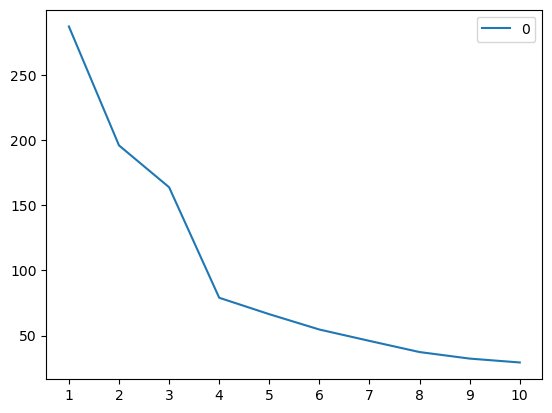

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(xticks=elbow_df.index)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [40]:
# Initialize the K-Means model using the best value for k
kmeans_best = KMeans(n_clusters=4)

In [41]:
# Fit the K-Means model using the scaled data
kmeans_best.fit(scaled_market_data)

KMeans(n_clusters=4)

In [42]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_scaled_market = kmeans_best.predict(scaled_market_data)

# View the resulting array of cluster values.
predicted_scaled_market

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [43]:
# Create a copy of the DataFrame
copy_scaled_market_data_df = scaled_market_data_df.copy()

In [44]:
# Add a new column to the DataFrame with the predicted clusters
copy_scaled_market_data_df["crypto_cluster"] = predicted_scaled_market

# Display sample data
copy_scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

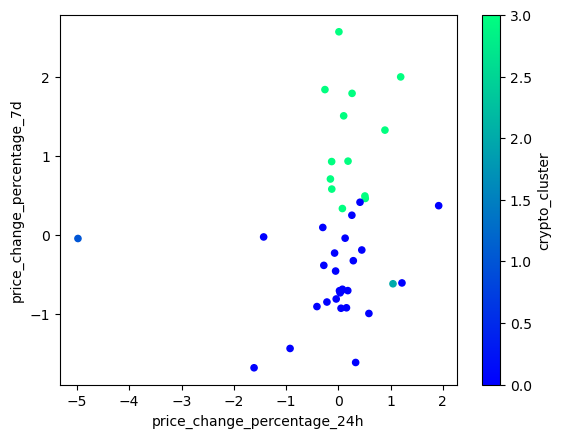

In [48]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copy_scaled_market_data_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="crypto_cluster", colormap="winter")

### Optimize Clusters with Principal Component Analysis.

In [50]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [54]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
components = pca.fit_transform(scaled_market_data_df)

# View the first five rows of the DataFrame. 
components[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [58]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 37% from the first principal, 35% from the second principal, and 17% from the third principal, so 89.5%

In [63]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(components, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
pca_df["coin_id"] = scaled_market_data_df.index

# Set the coinid column as index
pca_df.set_index("coin_id", inplace=True)

# Display sample data
pca_df

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [66]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
potential_k_values = list(range(1, 11))

# Create an empty list to store the inertia values
intertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in potential_k_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    intertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_map = {x:y for x,y in zip(potential_k_values, intertia_values)}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame.from_dict(pca_elbow_map, orient="index")

# Display the DataFrame
pca_elbow_df

,0
1,256.874086
2,168.811896
3,115.918077
4,49.665497
5,38.584870
6,27.720626
7,21.182776
8,21.358762
9,14.409518
10,10.935240


<Axes: >

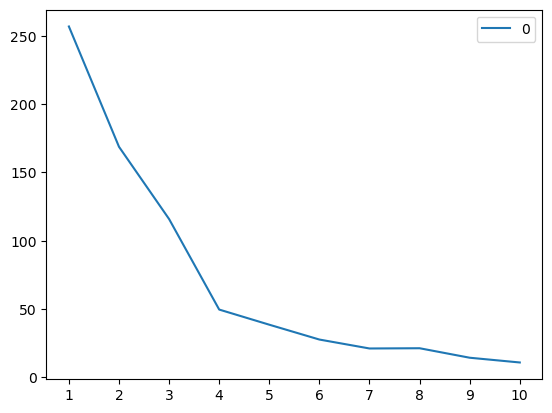

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.plot.line(xticks=pca_elbow_df.index)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [68]:
# Initialize the K-Means model using the best value for k
kmeans2 = KMeans(n_clusters=4)

In [69]:
# Fit the K-Means model using the PCA data
kmeans2.fit(pca_df)

KMeans(n_clusters=4)

In [70]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kmeans_pred = kmeans2.predict(pca_df)

# Print the resulting array of cluster values.
kmeans_pred

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [71]:
# Create a copy of the DataFrame with the PCA data
copy_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_pca_df["prediction"] = kmeans_pred

# Display sample data
copy_pca_df.head()

,PCA1,PCA2,PCA3,prediction
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


<Axes: xlabel='PCA1', ylabel='PCA2'>

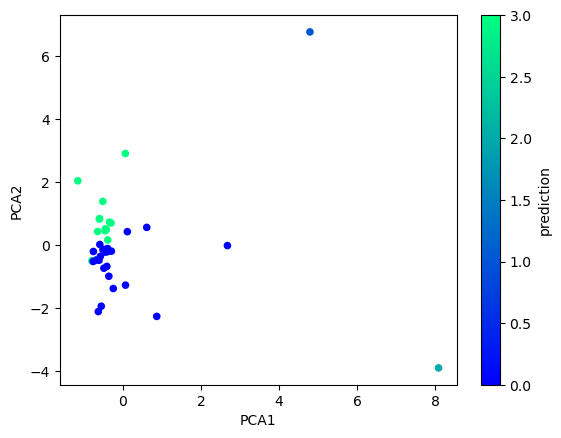

In [74]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
copy_pca_df.plot.scatter(x="PCA1", y="PCA2", c="prediction", colormap="winter")

### Determine the Weights of Each Feature on each Principal Component

In [86]:
# Use the columns from the original scaled DataFrame as the index.
# for i, j in enumerate(scaled_market_data_df.columns):
#     print(f"{j} - {pca.components_[i]}")
pca_weight_df = pd.DataFrame(pca.components_, columns=scaled_market_data_df.columns, index=["PCA1", "PCA2", "PCA3"])

pca_weight_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PCA2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PCA3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** For PCA1, 'price_change_percentage_200d' and 'price_change_percentage_24h'. For PCA2, 'price_change_percentage_30d' and 'price_change_percentage_1y'. For PCA3, 'price_change_percentage_7d' and 'price_change_percentage_60d'.
    